In [3]:
import pandas as pd
import math

In [4]:
wikipedia_example = {'Class' : ['C','C','C','C','NC','NC','NC'], 'Mut1' : [1,1,1,0,0,0,1], 'Mut2' : [1,1,0,1,0,1,1], 'Mut3':[1,0,1,1,0,0,0], 'Mut4' : [0,1,1,0,0,0,0]}
dataset = pd.DataFrame(data=wikipedia_example)

In [5]:
print(math.log2(1))

0.0


In [6]:
dataset

Class  Mut1  Mut2  Mut3  Mut4
0     C     1     1     1     0
1     C     1     1     0     1
2     C     1     0     1     1
3     C     0     1     1     0
4    NC     0     0     0     0
5    NC     0     1     0     0
6    NC     1     1     0     0

To count the number of rows with 'C'

In [7]:
(dataset['Class'] == 'C').values.sum()

4

To count the number of rows with 'NC'

In [8]:
(dataset['Class'] == 'NC').values.sum()

3

In [9]:
len(dataset.index)

7

In [10]:
def calc_entropy ( sample ) :
    # Assumes sample is a pandas dataframe
    # Assumes  classes is a list of classes appearing in the 'Class' column of the dataset
    prob_dict = {}
    #Return all the unique classes
    classes = sample['Class'].unique()
    total_samples = len(sample.index)
    for i in classes : 
        count = (sample['Class'] == i).values.sum()
        #print ("class = ",i, "count = ", count)
        prob_dict[i] = count/total_samples
    total_entropy = 0.0
    for i in classes:
        total_entropy += -1 * (prob_dict[i]) * math.log2 ( prob_dict[i])
    return (total_entropy)

In [11]:
calc_entropy (dataset)

0.9852281360342515

In [12]:
def information_gain (sample , feature) :
    # Assume that sample is a pandas data fram
    # Assume that feature is some column appearing in sample.
    feature_values = sample[feature].unique()
 #   entropies = {}
    sample_size = len(sample.index)
#    print("sample_size = ",sample_size)
    weighted_relative = 0.0
    for i in feature_values : 
        print("\n\n")
        print ("Calculating for ",i)
        new_sample = sample.copy()
        new_sample = new_sample[ new_sample[feature] == i]
        new_sample_size = len(new_sample.index)
        print("new_sample_size = ",new_sample_size)
        print(new_sample)
        relative_entropy = calc_entropy(new_sample)
        print("relative_entropy = ",relative_entropy)
  #      entropies[i] = relative_entropy
        weighted_relative += (new_sample_size/sample_size)*relative_entropy
    return(calc_entropy(sample) - weighted_relative)
#    return(entropies)
    

In [13]:
information_gain(dataset , 'Mut1')




Calculating for  1
new_sample_size =  4
  Class  Mut1  Mut2  Mut3  Mut4
0     C     1     1     1     0
1     C     1     1     0     1
2     C     1     0     1     1
6    NC     1     1     0     0
relative_entropy =  0.8112781244591328



Calculating for  0
new_sample_size =  3
  Class  Mut1  Mut2  Mut3  Mut4
3     C     0     1     1     0
4    NC     0     0     0     0
5    NC     0     1     0     0
relative_entropy =  0.9182958340544896


0.12808527889139443

In [14]:
information_gain(dataset, 'Mut2')




Calculating for  1
new_sample_size =  5
  Class  Mut1  Mut2  Mut3  Mut4
0     C     1     1     1     0
1     C     1     1     0     1
3     C     0     1     1     0
5    NC     0     1     0     0
6    NC     1     1     0     0
relative_entropy =  0.9709505944546686



Calculating for  0
new_sample_size =  2
  Class  Mut1  Mut2  Mut3  Mut4
2     C     1     0     1     1
4    NC     0     0     0     0
relative_entropy =  1.0


0.0059777114237740125

In [15]:
information_gain(dataset, 'Mut3')




Calculating for  1
new_sample_size =  3
  Class  Mut1  Mut2  Mut3  Mut4
0     C     1     1     1     0
2     C     1     0     1     1
3     C     0     1     1     0
relative_entropy =  0.0



Calculating for  0
new_sample_size =  4
  Class  Mut1  Mut2  Mut3  Mut4
1     C     1     1     0     1
4    NC     0     0     0     0
5    NC     0     1     0     0
6    NC     1     1     0     0
relative_entropy =  0.8112781244591328


0.5216406363433185

In [16]:
information_gain(dataset, 'Mut4')




Calculating for  0
new_sample_size =  5
  Class  Mut1  Mut2  Mut3  Mut4
0     C     1     1     1     0
3     C     0     1     1     0
4    NC     0     0     0     0
5    NC     0     1     0     0
6    NC     1     1     0     0
relative_entropy =  0.9709505944546686



Calculating for  1
new_sample_size =  2
  Class  Mut1  Mut2  Mut3  Mut4
1     C     1     1     0     1
2     C     1     0     1     1
relative_entropy =  0.0


0.2916919971380597

In [17]:
feature_cols = ['Mut1' , 'Mut2' , 'Mut3' , 'Mut4'] 

In [19]:
X = dataset.loc[:,feature_cols]

In [21]:
X

Mut1  Mut2  Mut3  Mut4
0     1     1     1     0
1     1     1     0     1
2     1     0     1     1
3     0     1     1     0
4     0     0     0     0
5     0     1     0     0
6     1     1     0     0

In [24]:
y = dataset.Class

In [25]:
y

0     C
1     C
2     C
3     C
4    NC
5    NC
6    NC
Name: Class, dtype: object

In [26]:
from sklearn import tree

In [31]:
clf = tree.DecisionTreeClassifier(criterion="entropy")

In [32]:
clf = clf.fit(X,y)

[Text(0.6, 0.8333333333333334, 'Mut3 <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = C'),
 Text(0.4, 0.5, 'Mut4 <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = NC'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = NC'),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = C'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = C')]

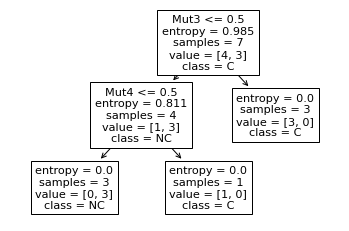

In [44]:
tree.plot_tree(clf, feature_names = feature_cols , class_names = ['C','NC'])

In [37]:
!pip install graphviz

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as


In [42]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None , feature_names = feature_cols , class_names = ['C','NC'])
graph = graphviz.Source(dot_data)

In [43]:
graph.render("Hello")

'Hello.pdf'